<center><h1 style = "font-family:Impact;color:black;font-weight:bold">  Travel Package Purchase Prediction -Ensemble Techniques</h1></center>

### Ensemble Methods

- Ensemble is a group of estimators that are used together for prediction in classification as well as regression problems.
- Ensemble is the belief that a committee of experts working together are more likely to be accurate than individual experts.
- Ensemble method uses n number of base estimators and combines their output to give a final prediction giving better performance and robustness than a single estimator.
- For ensemble to be effective we have to ensure
    - The base estimators are as different from each other as possible.
    - The errors made by each estimator should be different from each other (independent errors)

Bagging and Boosting are two ensemble methods.


Bagging |Boosting |
-----|-----|
All the weak learners are built in parallel i.e. independent of each other|Successive weak learners to improve the accuracy from the prior learners|
Each weak learner has equal weight in the final prediction.|More weight to those weak learners with better performance|
Samples are drawn from the original dataset with replacement to train each individual weak learner|Subsequent samples have more of those observations which had relatively higher errors in previous weak learners|
Can help  reduce variance of the mode|Can help  reduce bias of the mode|
Example: Bagging Classifier, Random Forest|Example: AdaBoost, Gradient Boosting Classifier


<h2 style = "font-family:Impact;color:black;font-weight:bold">Table of Contents</h2>

- [Context](#Context) 
- [Data Dictionary](#Data-Dictionary)
- [Problem](#Problem)
- [Libraries](#Libraries)
- [Read and Understand Data](#Read-and-Understand-data)
- [Data Preprocessing](#Data-Preprocessing)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis) 
    - [Univariate Analysis](#Univariate-Analysis) 
    - [Bivariate and Multivariate Analysis](#Bivariate-&-Multivariate-Analysis)
- [Missing value Detection and Treatment](#Missing-value-Detection-and-Treatment)   
- [Insights based on EDA](#Insights-based-on-EDA)
- [Outlier Detection](#Outlier-Detection)
- [Model Building Bagging](#Model-Building-Bagging)
   - [Decision Tree](#Decsion-Tree)
   - [Bagging classifier](#Bagging-Classifier)
   - [Random Forest](#Random-Forest)
- [Model Building Boosting](#Model-Building-Boosting) 
   - [Adaboost](#Adaboost)
   - [Gradient Boost](#Gradient-Boost)
   - [XGBoost](#XgBoost)
   - [Stacking Classifier](#Stacking-Classifier) 
- [Conclusion](#Conclusion) 
- [Business Recommendations & Insights](#Business-Recommendations-&-Insights)
- [Misclassfication Analysis](#Misclassification-Analysis) 
</p>



<h3 style = "font-family:Impact;color:black;font-weight:bold">Context</h3>

"Visit with us". company wants to enable and establish a viable business model to expand the customer base.
One of the ways to expand the customer base is to introduce a new offering of packages.
Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. 
Looking at the data of the last year, we observed that 18% of the customers purchased the packages.
However, the marketing cost was quite high because customers were contacted at random without looking
at the available information.The company is now planning to launch a new product i.e. Wellness Tourism Package. 
Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle,
and support or increase one's sense of well-being.However, this time company wants to harness the available data 
of existing and potential customers to make the marketing expenditure more efficient.

We need to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team 
and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

**Motivation of the book is to understand how to implement Bagging, Boosting and  How to tune Model using Hyperparmeters**

<h2 style = "font-family:Impact;color:black;font-weight:bold">Data Dictionary</h2>

Customer details:

- CustomerID: Unique customer ID
- ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
- Age: Age of customer
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
- CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
- Occupation: Occupation of customer
- Gender: Gender of customer
- NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
- PreferredPropertyStar: Preferred hotel property rating by customer
- MaritalStatus: Marital status of customer
- NumberOfTrips: Average number of trips in a year by customer
- Passport: The customer has a passport or not (0: No, 1: Yes)
- OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
- NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
- Designation: Designation of the customer in the current organization
- MonthlyIncome: Gross monthly income of the customer

Customer interaction data: 

- PitchSatisfactionScore: Sales pitch satisfaction score
- ProductPitched: Product pitched by the salesperson
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
- DurationOfPitch: Duration of the pitch by a salesperson to the customer

<h2 style = "font-family:Impact;color:black;font-weight:bold">Problem</h2> 

- To predict which customer is more likely to purchase the newly introduced travel package
- Which variables are most significant.
- Which segment of customers should be targeted more.



[Top](#Table-of-Contents)

<h3 style = "font-family:Impact;color:black;font-weight:bold">Libraries</h3>  

In [10]:
### IMPORT: ------------------------------------
# from pydantic import BaseSettings # OLD
from pydantic_settings import BaseSettings

import scipy.stats as stats 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

import statsmodels.api as sm
#--Sklearn library--
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function

from sklearn import metrics

from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

from xgboost import XGBClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression

# Libtune to tune model, get different metric scores

from sklearn.metrics import  classification_report, accuracy_score, precision_score, recall_score,f1_score
from sklearn.model_selection import GridSearchCV

# from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,plot_confusion_matrix #to plot confusion matric
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay


pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth',400)
# To supress numerical display in scientific notations
pd.set_option('display.float_format', lambda x: '%.5f' % x) 
warnings.filterwarnings('ignore') # To supress warnings
 # set the background for the graphs
plt.style.use('ggplot')
# For pandas profiling

# from pandas_profiling import ProfileReport

print('Load Libraries-Done')
#!pip install xlrd
#!!pip install openpyxl

Load Libraries-Done


<h3 style = "font-family:Impact;color:black;font-weight:bold">Read and Understand data</h3>  

In [11]:
#Reading the Excel file  used tourism.xlsx 
data_path='input/tour_package.csv'

#Loading the dataset - sheet_name parameter is used if there are tabs in the excel file
#df=pd.read_excel(data_path,sheet_name='Tourism')
df=pd.read_csv(data_path)

df_tour=df.copy()
print(f'There are {df_tour.shape[0]} rows and {df_tour.shape[1]} columns') # fstring 

There are 4888 rows and 20 columns


#### View the first and last 5 rows of the dataset.

In [12]:
df_tour.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.00000,Self Enquiry,3,6.00000,Salaried,Female,3,3.00000,Deluxe,3.00000,Single,1.00000,1,2,1,0.00000,Manager,20993.00000
1,200001,0,49.00000,Company Invited,1,14.00000,Salaried,Male,3,4.00000,Deluxe,4.00000,Divorced,2.00000,0,3,1,2.00000,Manager,20130.00000
2,200002,1,37.00000,Self Enquiry,1,8.00000,Free Lancer,Male,3,4.00000,Basic,3.00000,Single,7.00000,1,3,0,0.00000,Executive,17090.00000
3,200003,0,33.00000,Company Invited,1,9.00000,Salaried,Female,2,3.00000,Basic,3.00000,Divorced,2.00000,1,5,1,1.00000,Executive,17909.00000
4,200004,0,NaN,Self Enquiry,1,8.00000,Small Business,Male,2,3.00000,Basic,4.00000,Divorced,1.00000,0,5,1,0.00000,Executive,18468.00000


In [13]:
df_tour.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.00000,Self Enquiry,3,9.00000,Small Business,Male,3,5.00000,Deluxe,4.00000,Unmarried,2.00000,1,1,1,1.00000,Manager,26576.00000
4884,204884,1,28.00000,Company Invited,1,31.00000,Salaried,Male,4,5.00000,Basic,3.00000,Single,3.00000,1,3,1,2.00000,Executive,21212.00000
4885,204885,1,52.00000,Self Enquiry,3,17.00000,Salaried,Female,4,4.00000,Standard,4.00000,Married,7.00000,0,1,1,3.00000,Senior Manager,31820.00000
4886,204886,1,19.00000,Self Enquiry,3,16.00000,Small Business,Male,3,4.00000,Basic,3.00000,Single,3.00000,0,5,0,2.00000,Executive,20289.00000
4887,204887,1,36.00000,Self Enquiry,1,14.00000,Salaried,Male,4,4.00000,Basic,4.00000,Unmarried,3.00000,1,3,1,2.00000,Executive,24041.00000


#### Understand the  dataset.

In [14]:
#get the size of dataframe
print ("Rows     : " , df_tour.shape[0])  #get number of rows/observations
print ("Columns  : " , df_tour.shape[1]) #get number of columns
print ("#"*40,"\n","Features : \n\n", df_tour.columns.tolist()) #get name of columns/features
print ("#"*40,"\nMissing values :\n\n", df_tour.isnull().sum().sort_values(ascending=False))
print( "#"*40,"\nPercent of missing :\n\n", round(df_tour.isna().sum() / df_tour.isna().count() * 100, 2).sort_values(ascending=False)) # looking at columns with most Missing Values


Rows     :  4888
Columns  :  20
######################################## 
 Features : 

 ['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome']
######################################## 
Missing values :

 DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
CustomerID                    0
MaritalStatus                 0
ProdTaken                     0
NumberOfPersonVisiting        0

#### Check the data types of the columns for the dataset.

In [15]:
df_tour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

**Observations**
- There are lot of missing values.
- 5% values are missing in DurationOfPitch, that may be cause customer was never pitched, need to analyze further
- 4.77% values are missig from MonthlyIncome.
- Age has 4.62 % missing values.
- NumberOfChildrenVisiting,NumberOfFollowups,NumberOfTrips,PreferredPropertyStar,TypeofContact has less than 3% missing values 
- ProdTaken is the Target Variable
- Designation,Martial status,Product Pitched,Gender,Owncar,Passport,CityTier,PreferredPropertyStar, Occupation,Type of Contact are categorical variables while others are numerical value.

#### Summary of the dataset.

In [16]:
df_tour.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.00000,202443.50000,1411.18839,200000.00000,201221.75000,202443.50000,203665.25000,204887.00000
ProdTaken,4888.00000,0.18822,0.39092,0.00000,0.00000,0.00000,0.00000,1.00000
Age,4662.00000,37.62227,9.31639,18.00000,31.00000,36.00000,44.00000,61.00000
CityTier,4888.00000,1.65426,0.91658,1.00000,1.00000,1.00000,3.00000,3.00000
DurationOfPitch,4637.00000,15.49083,8.51964,5.00000,9.00000,13.00000,20.00000,127.00000
NumberOfPersonVisiting,4888.00000,2.90507,0.72489,1.00000,2.00000,3.00000,3.00000,5.00000
NumberOfFollowups,4843.00000,3.70845,1.00251,1.00000,3.00000,4.00000,4.00000,6.00000
PreferredPropertyStar,4862.00000,3.58104,0.79801,3.00000,3.00000,3.00000,4.00000,5.00000
NumberOfTrips,4748.00000,3.23652,1.84902,1.00000,2.00000,3.00000,4.00000,22.00000
Passport,4888.00000,0.29092,0.45423,0.00000,0.00000,0.00000,1.00000,1.00000


**Observations**
- Minimum age  of customer is `18` and Maximum age is `61` with mean of `37`.
- Mean Duration of pitch  is `15` mins to max of `127` mins.
- Mean Number of trips is `3` with maximum of `22`.This needs to be verified
- `Average monthly income` of customer is `23619` with maximum of `98678`. This needs to be verified
- `920` customer had taken package last time.


[Top](#Table-of-Contents)

<h3 style = "font-family:Impact;color:black;font-weight:bold"> Data Preprocessing</h3>  

#### Droping customer id

In [17]:
df_tour.drop(['CustomerID'],axis=1,inplace=True)

In [18]:

cat_cols = ['Designation','ProdTaken', 'OwnCar', 'Passport',
            'CityTier','MaritalStatus',
            'ProductPitched','Gender','Occupation','TypeofContact'
            ]

In [19]:
for i in cat_cols:
    print('Unique values in',i, 'are :')
    print(df_tour[i].value_counts())
    print('*'*50)

Unique values in Designation are :
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64
**************************************************
Unique values in ProdTaken are :
0    3968
1     920
Name: ProdTaken, dtype: int64
**************************************************
Unique values in OwnCar are :
1    3032
0    1856
Name: OwnCar, dtype: int64
**************************************************
Unique values in Passport are :
0    3466
1    1422
Name: Passport, dtype: int64
**************************************************
Unique values in CityTier are :
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
**************************************************
Unique values in MaritalStatus are :
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
**************************************************
Unique values in ProductPitched are :

- `Single` and `unmarried` status are not same category . Unmarried here means customers having partners.
- `Female` and `Fe male` are same category , Data needs to be fixed
- 3 star property is prefered by customers
- Most of the customers are from Tier1 cities

#### Processing Gender status.
Female and Fe male are two category in dataset , fixing it to Female

In [20]:
df_tour.Gender.value_counts()

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

In [21]:
df_tour['Gender'] = df_tour['Gender'].apply(lambda x: 'Female' if x == 'Fe Male' else x)

In [22]:
df_tour.Gender.value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

In [23]:
## Converting the data type of categorical features to 'category'

cat_cols = ['Designation','ProdTaken', 'OwnCar', 'Passport',
            'CityTier','MaritalStatus',
            'ProductPitched','Gender','Occupation','TypeofContact'
            ]
df_tour[cat_cols] = df_tour[cat_cols].astype('category')
df_tour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   category
 1   Age                       4662 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4637 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4843 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4862 non-null   float64 
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4748 non-null   float64 
 13  Passport                  4888 non-null   catego

In [24]:
df_tour.describe(include=['category']).T

,count,unique,top,freq
ProdTaken,4888,2,0,3968
TypeofContact,4863,2,Self Enquiry,3444
CityTier,4888,3,1,3190
Occupation,4888,4,Salaried,2368
Gender,4888,2,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Passport,4888,2,0,3466
OwnCar,4888,2,1,3032
Designation,4888,5,Executive,1842


#### Age

Age can be a vital factor in tourism, converting ages to bin to explore if there is any pattern

In [25]:
df_tour.Age.describe()

count   4662.00000
mean      37.62227
std        9.31639
min       18.00000
25%       31.00000
50%       36.00000
75%       44.00000
max       61.00000
Name: Age, dtype: float64

In [26]:
df_tour['Agebin'] = pd.cut(df_tour['Age'], bins = [18,25, 31, 40, 50, 65], labels = ['18-25','26-30', '31-40', '41-50', '51-65'])

In [27]:
df_tour.Agebin.value_counts()

31-40    1722
41-50    1073
26-30     971
51-65     549
18-25     333
Name: Agebin, dtype: int64

### Income
To understand customers segments derving new columns which will help us identify if customer in different income range

In [28]:
df_tour.MonthlyIncome.describe()

count    4655.00000
mean    23619.85349
std      5380.69836
min      1000.00000
25%     20346.00000
50%     22347.00000
75%     25571.00000
max     98678.00000
Name: MonthlyIncome, dtype: float64

In [29]:
df_tour['Incomebin'] = pd.cut(df_tour['MonthlyIncome'], bins = [0,15000,20000, 25000, 30000,35000,40000,45000,50000,100000], labels = ['<15000', '<20000', '<25000', '<30000','<35000','<40000','<45000','<50000','<100000'])

In [30]:
df_tour.Incomebin.value_counts()

<25000     2257
<20000     1038
<30000      768
<35000      382
<40000      206
<15000        2
<100000       2
<45000        0
<50000        0
Name: Incomebin, dtype: int64

[Top](#Table-of-Contents)

<h2 style = "font-family:Impact;color:black;font-weight:bold"> Exploratory Data Analysis</h2>

### Univariate Analysis

In [31]:
def dist_box(data):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    sns.set_theme(style="white")
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',color="teal",ax=ax_box)
    ax_box.set(xlabel='')
     # just trying to make visualisation better. This will set background to white
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    sns.distplot(data,kde=False,color='purple',ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})
                    

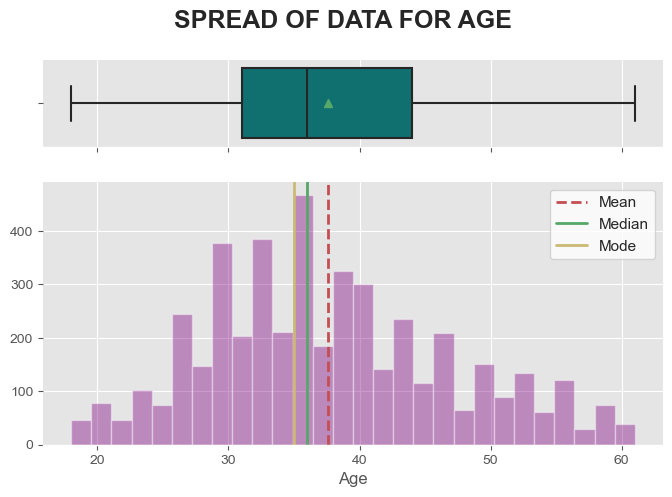

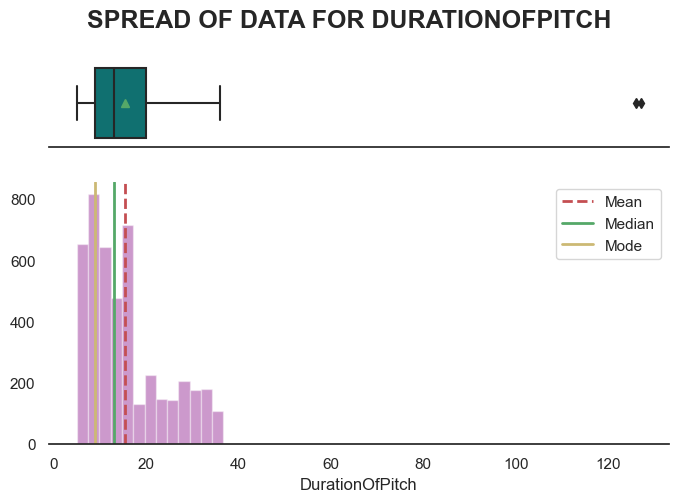

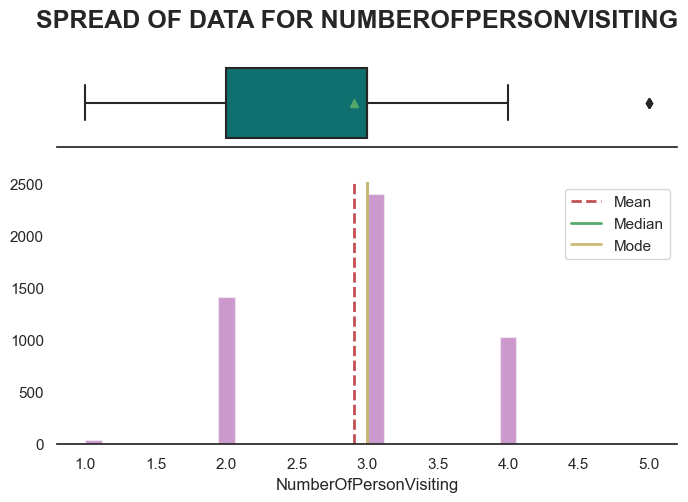

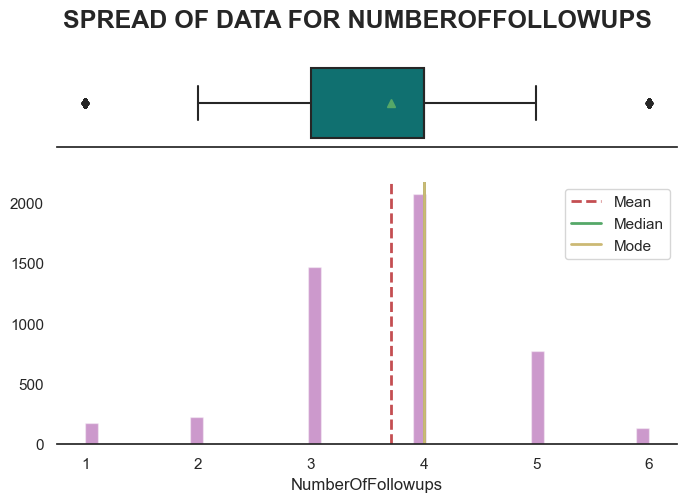

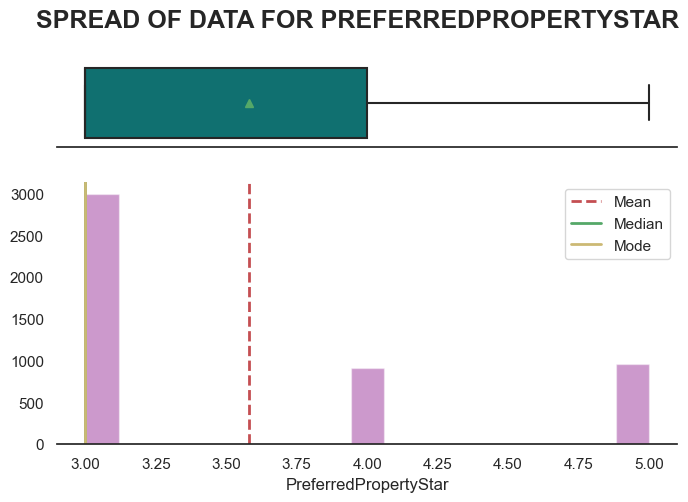

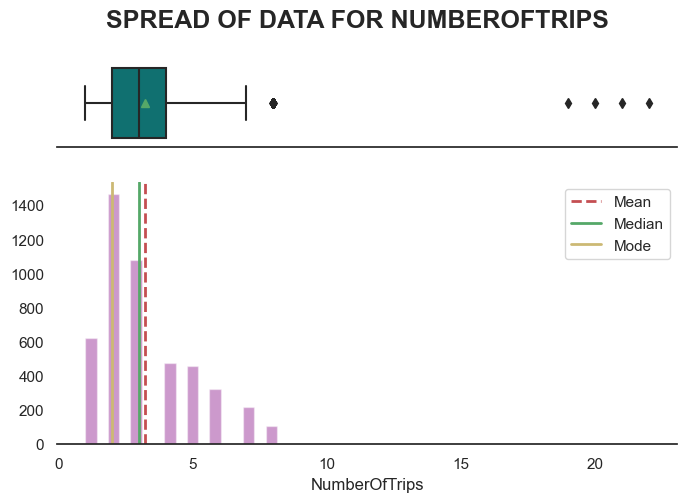

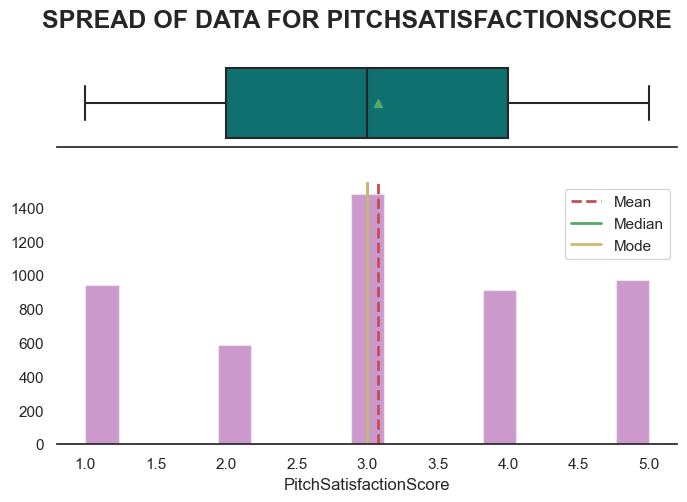

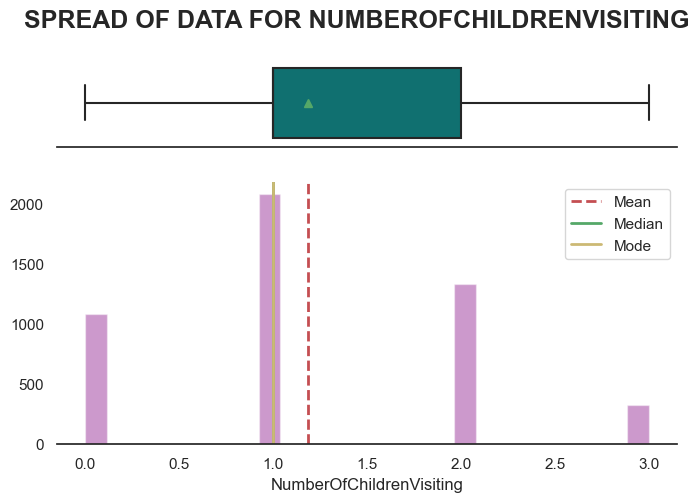

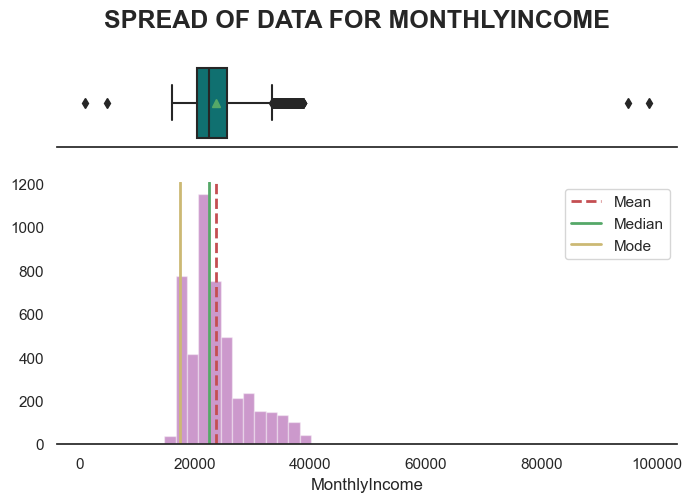

In [32]:
#select all quantitative columns for checking the spread
list_col=  df_tour.select_dtypes(include='number').columns.to_list()
for i in range(len(list_col)):
    dist_box(df_tour[list_col[i]])

**Observations**
- Age is normally distrubted  and doesn't have any outliers
- Duration of pitch is Right skewed with some outliers  greater than 120 .Need to see if this are to be treated.
- Number of visitors is usually 3 with a outlier of 5.
- Average number of folows up are 4 with extreme of 6 
- Number of trips is right skewed with some outliers where trips are greater than 17.
- Monthly income is Right skewed. and has some outlier as higher end.


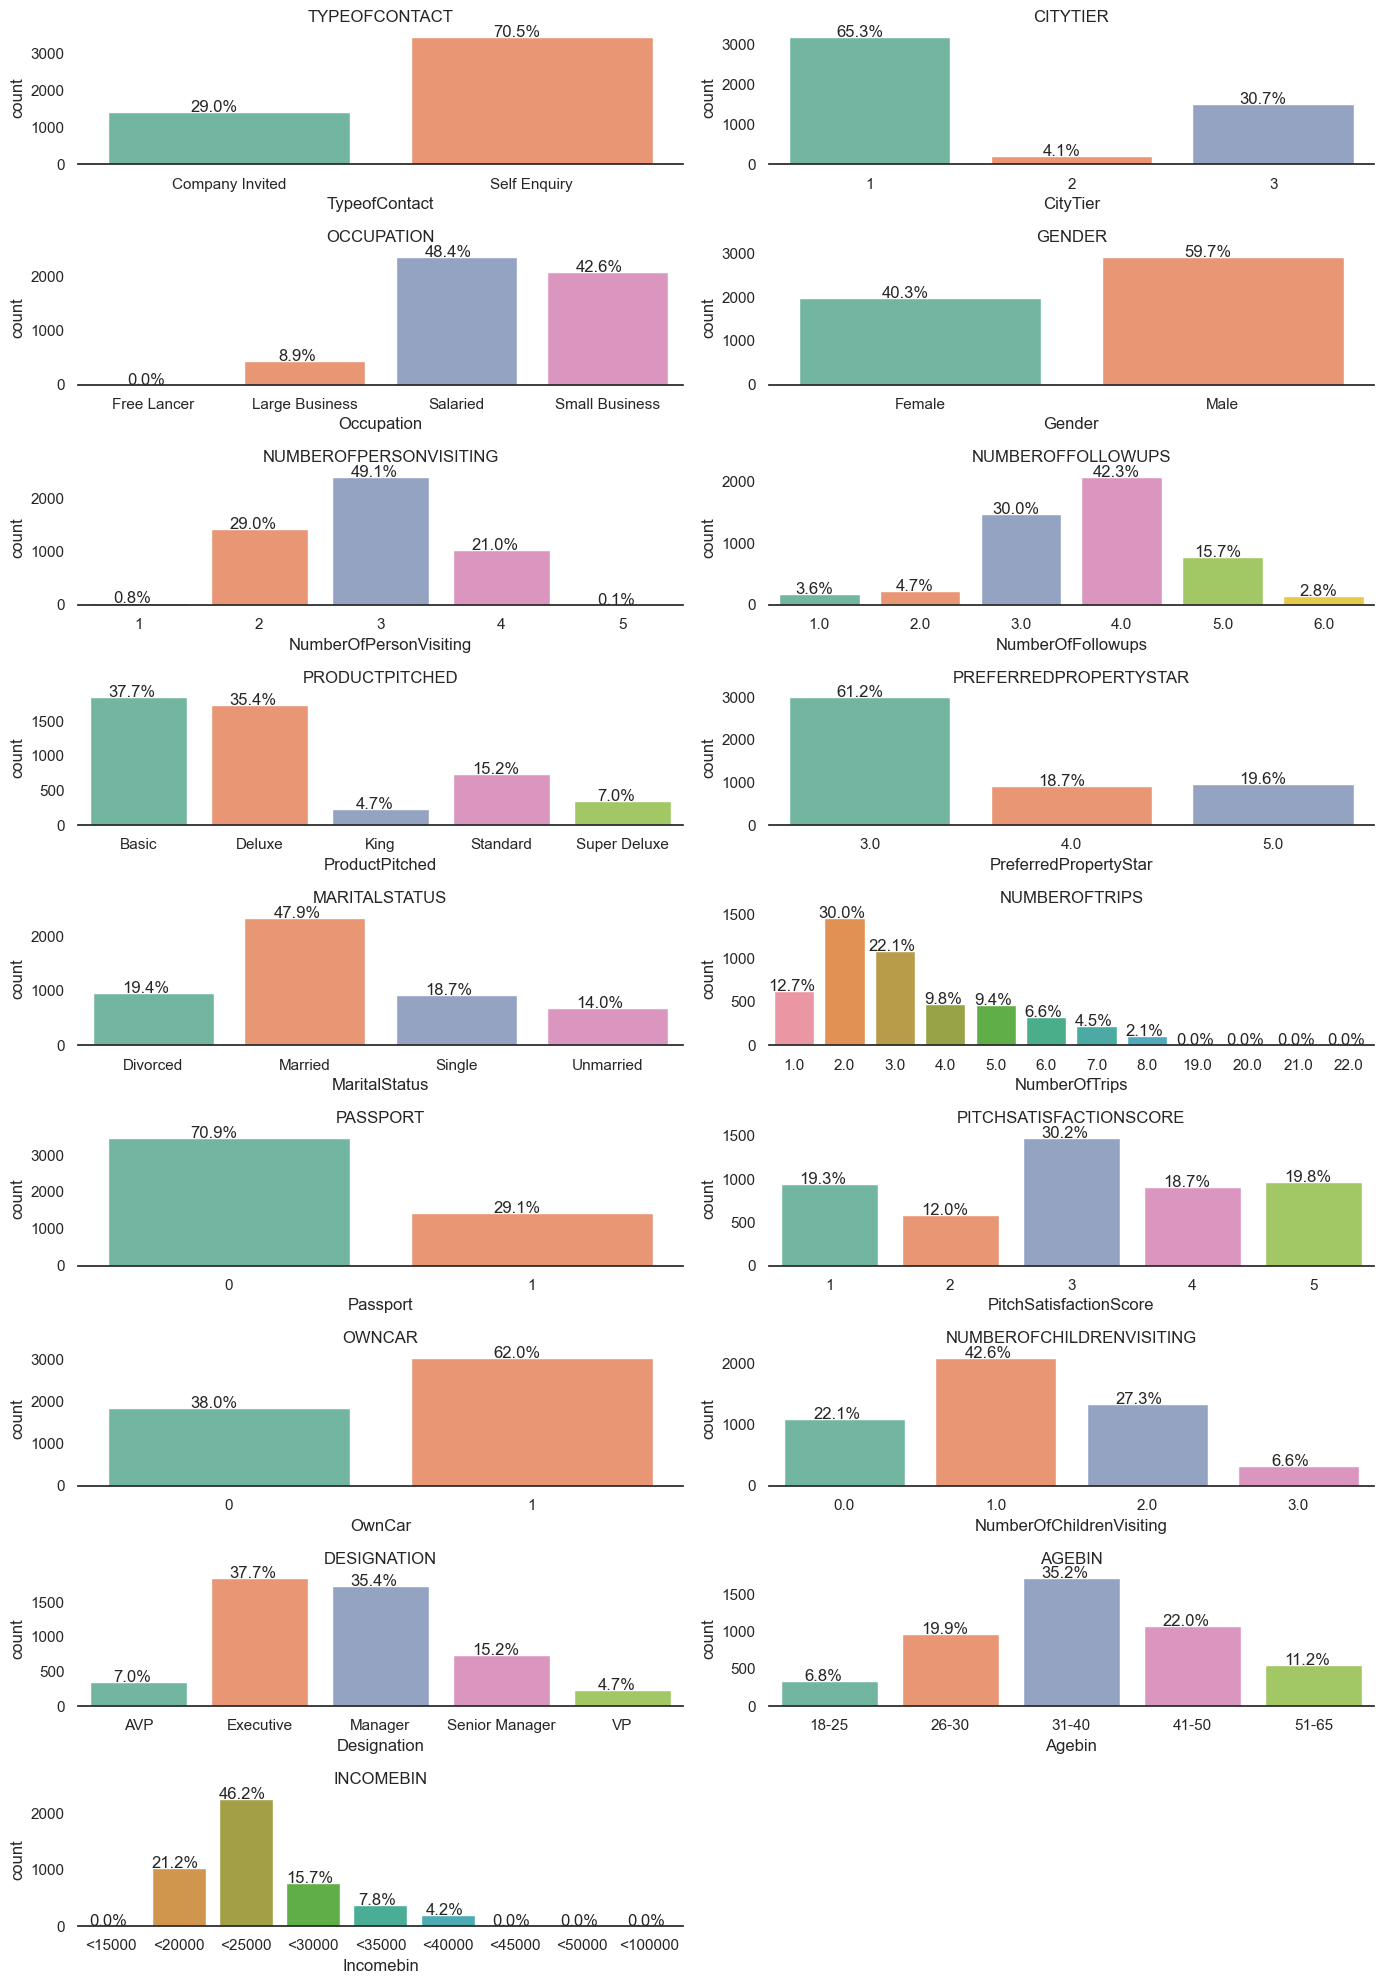

In [33]:
# Making a list of all categorical variables

plt.figure(figsize=(14,20))

sns.set_theme(style="white") 
cols=['TypeofContact', 'CityTier', 'Occupation', 'Gender',
        'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched', 
        'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips',
        'Passport', 'PitchSatisfactionScore',
        'OwnCar', 'NumberOfChildrenVisiting', 
        'Designation','Agebin','Incomebin']
for i, variable in enumerate(cols):
                     plt.subplot(9,2,i+1)
                     order = df_tour[variable].value_counts(ascending=False).index   
                     #sns.set_palette(list_palette[i]) # to set the palette
                     sns.set_palette('Set2')
                     ax=sns.countplot(x=df_tour[variable], data=df_tour )
                     sns.despine(top=True,right=True,left=True) # to remove side line from graph
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(df_tour[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.tight_layout()
                     plt.title(cols[i].upper())
                                     


**Observations**
- ~38 % customers are Executive, followed by 35% are managers.
- ~18% customers accepted product offered last time.
- ~ 62 % customer own car.
- ~29 % customers has a passport.
- ~ 65 % customers are from Tier 1 cities.
- ~ 61 % customers prefer 3 star property. 
- ~ 48 % customers are married
- Basic package was pitched to ~ 38 % of customers and 35 % were pitched Deluxe package.
- 60 % customers are male.
- Occupation of ~ 49 % customer is  salaried.
- 70.5 % customer  self enquiried for the packages.
- Most of the customers travelled along with 3 people.
- Most of the customers take 2 trips per year but as seen previously there are some extreme values like 22.
- Most of the customers travelled with  only one child.
- Most of the customers were followed up 4 times.
- Majority  of customer monthly income is in 20000-25000 range.Most customer fall in 15000-30000 monthly income range.
- ~35% are in 31-40 Age group.  Most customer are in 26-50 age range

### Bivariate & Multivariate Analysis

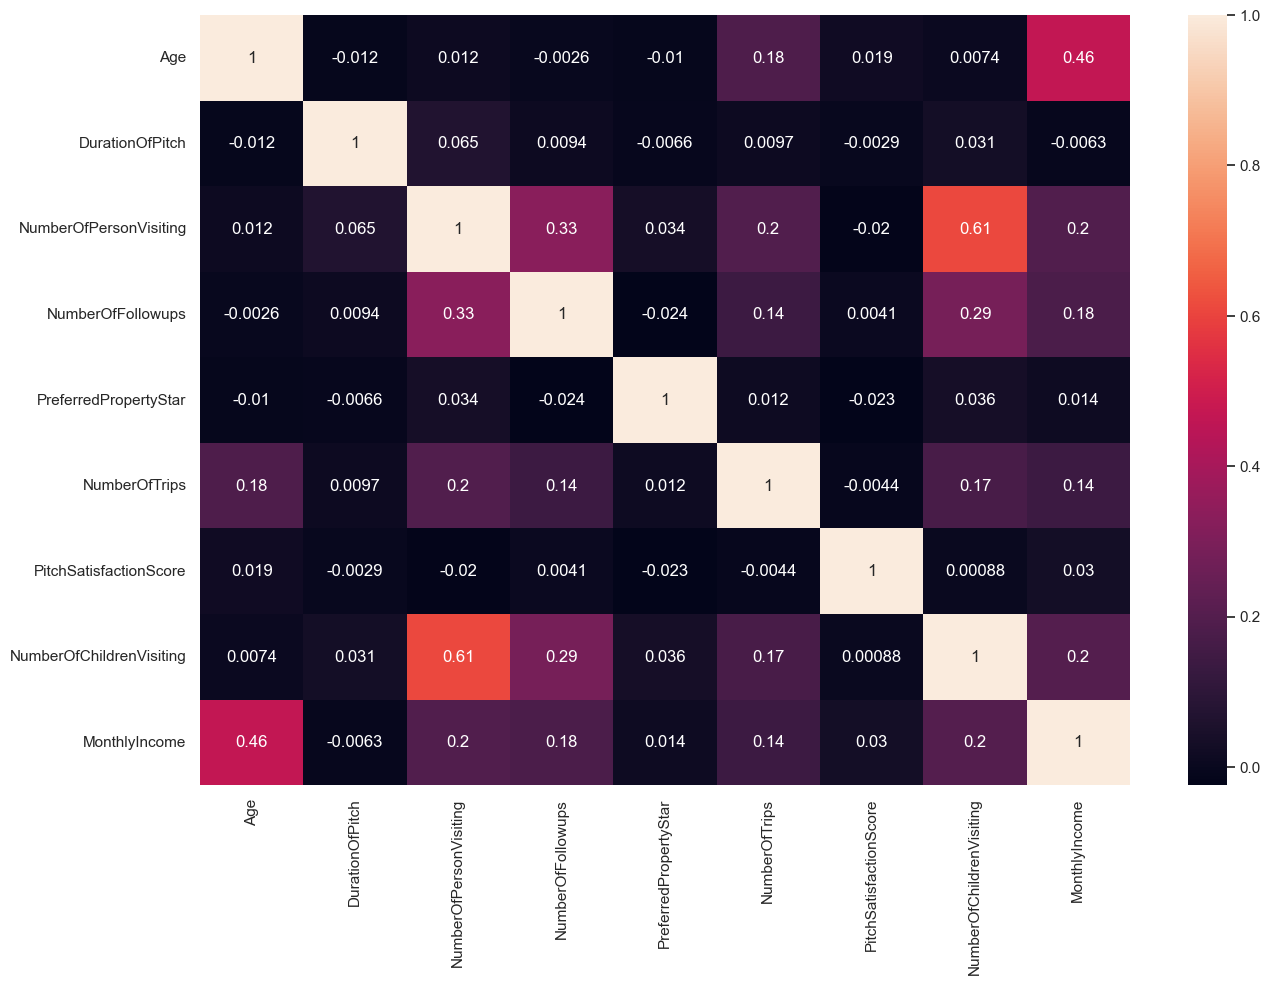

In [34]:
sns.set_palette(sns.color_palette("Set2", 8))
plt.figure(figsize=(15,10))
sns.heatmap(df_tour.corr(),annot=True)
plt.show()

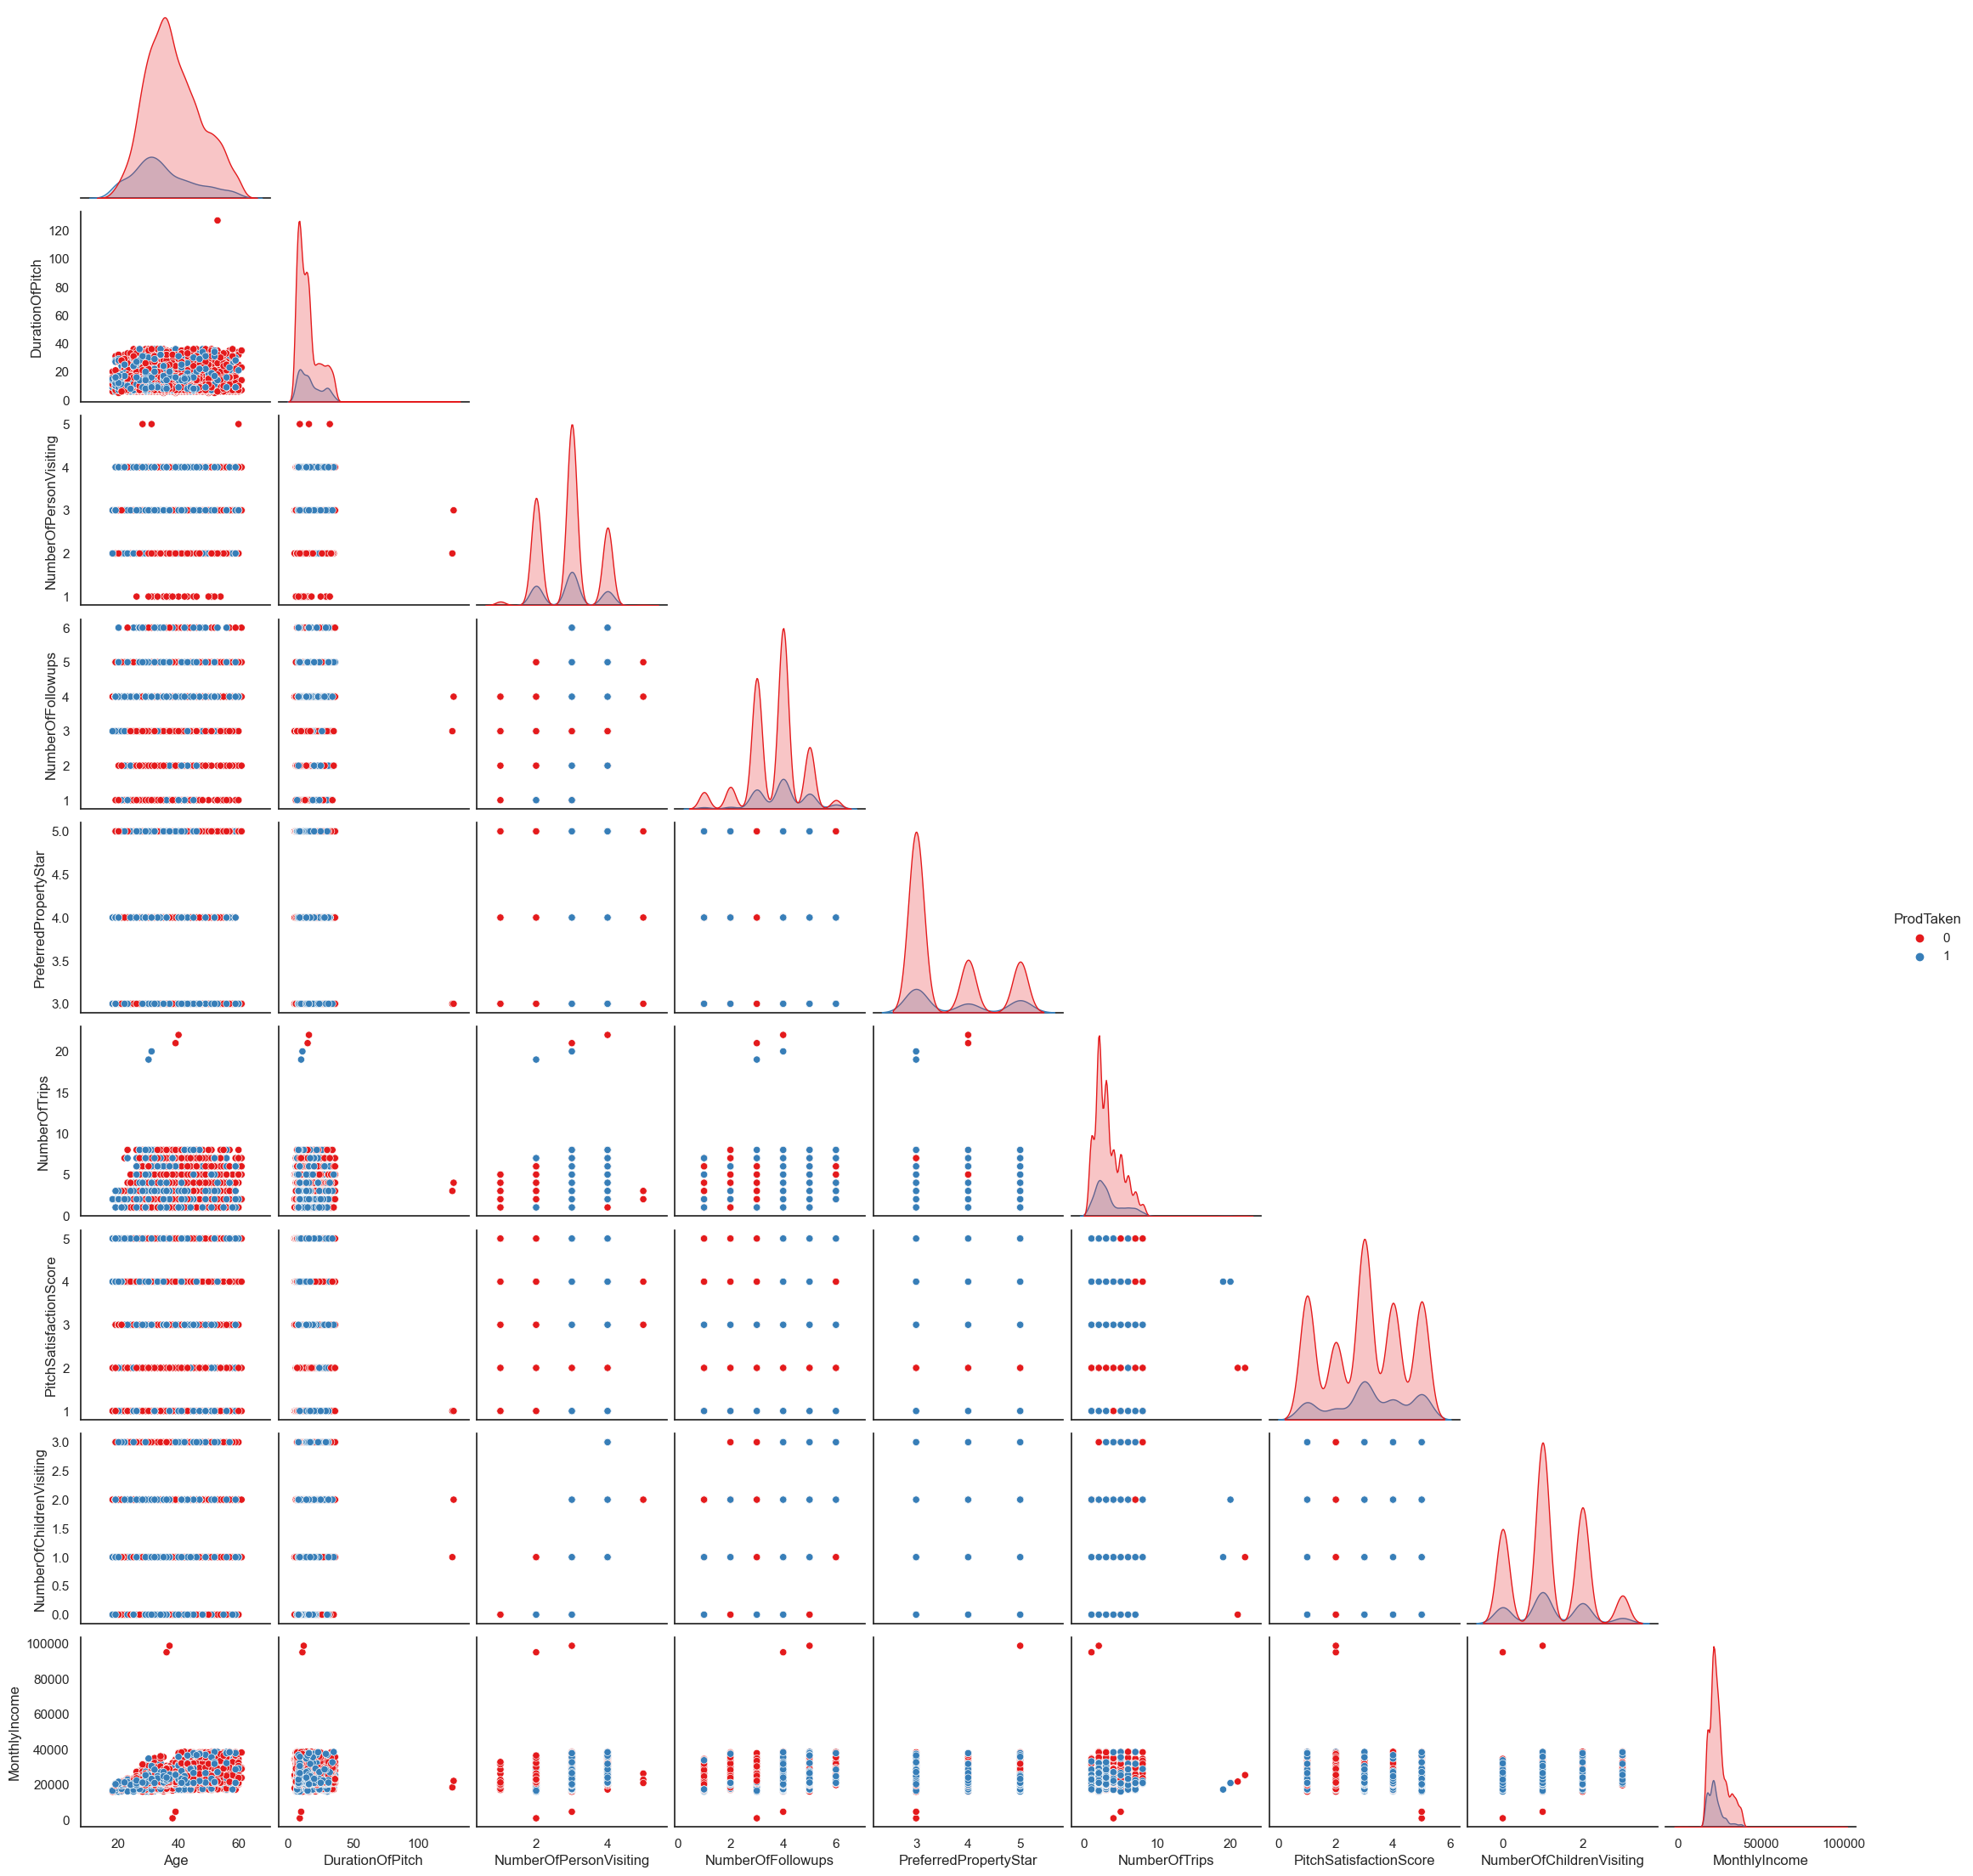

In [35]:
sns.set_palette(sns.color_palette("Set1", 8))
sns.pairplot(df_tour, hue="ProdTaken",corner=True)
plt.show()

**Observations**
- Monthlyincome and Age has weak correlation
- Number of children visiting and number of person vsiting has correlation as expected.
- Numberof follow up and number of person vsiting has very weak correlation.
-

In [36]:
### Function to plot distributions and Boxplots of customers
def plot(x,target='ProdTaken'):
    fig,axs = plt.subplots(2,2,figsize=(12,10))
    axs[0, 0].set_title(f'Distribution of {x} \n of a customer who had Not taken Product',fontsize=12,fontweight='bold')
    sns.distplot(df_tour[(df_tour[target] == 0)][x],ax=axs[0,0],color='teal')
    axs[0, 1].set_title(f"Distribution of {x}\n of a customer who had taken Product",fontsize=12,fontweight='bold')
    sns.distplot(df_tour[(df_tour[target] == 1)][x],ax=axs[0,1],color='orange')
    axs[1,0].set_title(f'Boxplot of {x} w.r.t Product taken',fontsize=12,fontweight='bold')
    
    line = plt.Line2D((.1,.9),(.5,.5), color='grey', linewidth=1.5,linestyle='--')
    fig.add_artist(line)
   
    sns.boxplot(df_tour[target],df_tour[x],ax=axs[1,0],palette='gist_rainbow',showmeans=True)
    axs[1,1].set_title(f'Boxplot of {x} w.r.t Product Taken - Without outliers',fontsize=12,fontweight='bold')
    sns.boxplot(df_tour[target],df_tour[x],ax=axs[1,1],showfliers=False,palette='gist_rainbow',showmeans=True) #turning off outliers from boxplot
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    plt.tight_layout(pad=4)
    plt.show()

TypeError: boxplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given

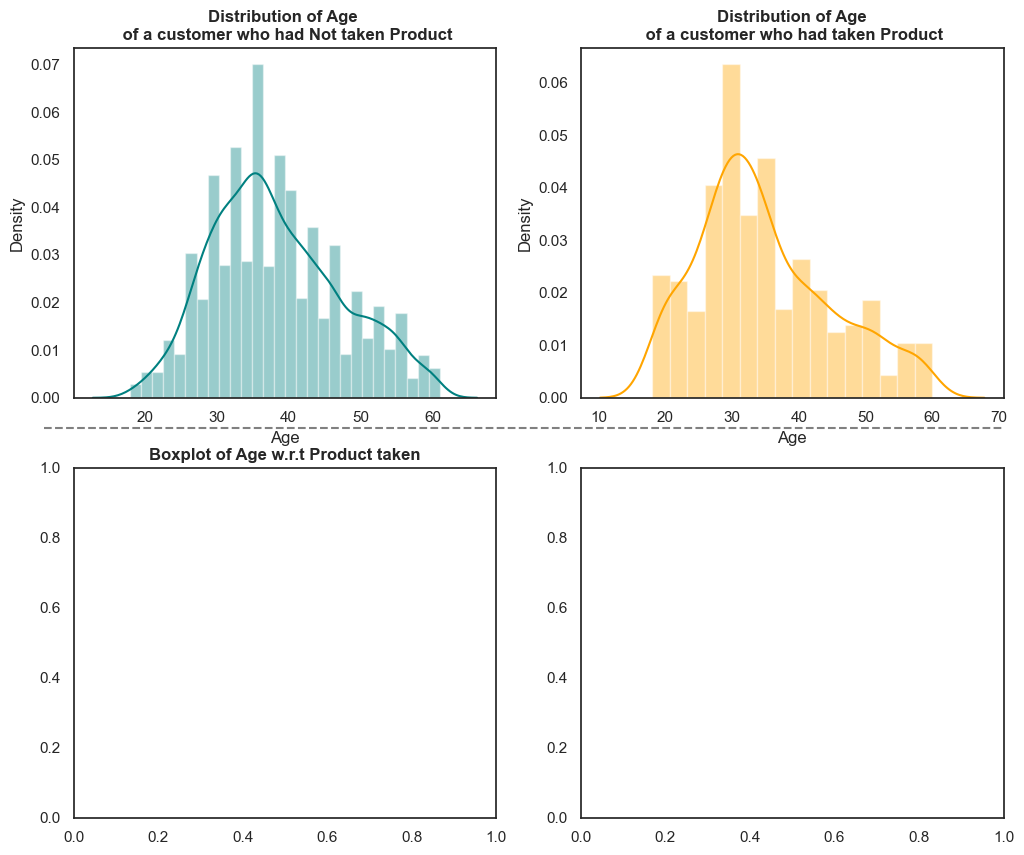

In [37]:
#select all quantitative columns for checking the spread
#list_col=  ['Age','DurationOfPitch','MonthlyIncome']
list_col=df_tour.select_dtypes(include='number').columns.to_list()
#print(list_col)
#plt.figure(figsize=(14,23))
for j in range(len(list_col)):
   plot(list_col[j])
   

**Observation**
- Customers who purchased the product are mostly in age range of 28 -35
- Duration of pitch suprisingly for customer who purchased product where 10- 40 min. There are some outliers in duration of pitch for customers who didn't take the product
- Number of trips has some outliers like 17 -20.
- Monthly income has extreme outliers.Customers who purchased product are in earning on average 18000-23000 monthly


In [ ]:
sns.set_palette(sns.color_palette("nipy_spectral", 8))

sns.swarmplot(y='MonthlyIncome',x='Occupation',hue='ProdTaken',data=df_tour)
sns.despine(top=True,right=True,left=True) # to remove side line from graph
plt.title('Monthly Income vs Occupation')

In [ ]:
sns.set_palette(sns.color_palette("nipy_spectral", 8))
sns.scatterplot(y='MonthlyIncome',x='Age',hue='ProdTaken',data=df_tour)
sns.despine(top=True,right=True,left=True) # to remove side line from graph
plt.title('Monthly Income vs Age')


<h2 style = "font-family:Impact;color:black;font-weight:bold">Missing value Detection and Treatment</h2>

In [ ]:
df_tour.isnull().sum()

#### Missing value Treatment Type of contact

In [ ]:
df_tour['TypeofContact'].value_counts()

Highest ocurring value is `Self Inquiry`. We will impute the missing value for TypeofContact using the mode(highest occuring value) of the feature.

In [ ]:
df_tour['TypeofContact'].mode()

df_tour['TypeofContact']=df_tour['TypeofContact'].fillna('Self Enquiry')

In [ ]:
#Verify if there are null values
df_tour["TypeofContact"].isnull().sum()

#### Missing value Treatment number of followup.

In [ ]:
df_tour.groupby(["Gender",'ProductPitched'])["NumberOfFollowups"].median()

df_tour['NumberOfFollowups']=df_tour.groupby(["Gender",'ProductPitched'])["NumberOfFollowups"].apply(lambda x:x.fillna(x.median()))

#### Missing value Treatment PreferredPropertyStar

In [ ]:
#Look at few rows where values  is missing
df_tour[df_tour["PreferredPropertyStar"].isnull()]

Let see how can impute PreferredPropertyStar using  designation  of customer for more granularity

In [ ]:
df_tour['PreferredPropertyStar']=df_tour.groupby(["Designation"])["PreferredPropertyStar"].apply(lambda x:x.fillna(x.median()))

df_tour[df_tour["PreferredPropertyStar"].isnull()]

#### Missing value Treatment Duration of pitch

Let see how can we impute Duration of pitch.In my opinion an important factor for how long sale person take times to market his sales pitch depends on Product which sale person is proposing , number of followup will also decide duration of pitch. Let verify this.

In [ ]:
df_tour.groupby(['ProductPitched','NumberOfFollowups'], as_index=False)["DurationOfPitch"].median()

# Impute missing Duration of pitch with median value
df_tour["DurationOfPitch"] = df_tour.groupby(["ProductPitched",'NumberOfFollowups'])["DurationOfPitch"].apply(
    lambda x: x.fillna(x.median())
)

In [ ]:
df_tour[df_tour["DurationOfPitch"].isnull()]

df_tour.isnull().sum()

#### Missing value Treatment for NumberOfTrips

In [ ]:
df_tour.groupby(['MaritalStatus'])["NumberOfTrips"].median()

For more granularity imputing number of trips using martial status

In [ ]:
# Impute missing NumberOfTrips of pitch with median value
df_tour["NumberOfTrips"] = df_tour.groupby(["MaritalStatus"])["NumberOfTrips"].apply(
    lambda x: x.fillna(x.median())
)

#### Missing value Treatment NumberOfChildrenVisiting

In [ ]:
df_tour[df_tour["NumberOfChildrenVisiting"].isnull()].head(10)

Assuming  children visited is missing because no children accompanied these customers so we will fill the missing values with 0

In [ ]:
# Impute missing NumberOfChildrenVisited with 0
df_tour['NumberOfChildrenVisiting']=df_tour['NumberOfChildrenVisiting'].fillna(0)

#### Missing value Treatment Age

 Imputing  age using designation,gender,Martial status would give more  granularity

In [ ]:
df_tour[df_tour["Age"].isnull()].head(10)

In [ ]:
df_tour.groupby(["Designation", "Gender","MaritalStatus"])["Age"].median()

# Impute missing Age with median value
df_tour["Age"] = df_tour.groupby(["Designation", "Gender","MaritalStatus"])["Age"].apply(
    lambda x: x.fillna(x.median())
)

#### Missing value Treatment MonthlyIncome

For more granularity imputing on occupation,Designation,Gender

In [ ]:
df_tour.groupby(["Occupation",'Designation','Gender'])["MonthlyIncome"].median()

In [ ]:
df_tour["MonthlyIncome"]=df_tour.groupby(["Occupation",'Designation','Gender'])["MonthlyIncome"].apply(
    lambda x: x.fillna(x.median())
)

In [ ]:
df_tour.isnull().sum() #verify if all missing values have been treated

Finally all missing values have been treated. 

#### Age

Age can be a vital factor in tourism, converting ages to bin to explore if there is any pattern

In [ ]:
df_tour.Age.describe()

In [ ]:
df_tour['Agebin'] = pd.cut(df_tour['Age'], bins = [15,25, 31, 40, 50, 70], labels = ['15-25','26-30', '31-40', '41-50', '51-70'])

In [ ]:
df_tour.Agebin.value_counts()

### Income
To understand customers segments derving new columns which will help us identify if customer in different income range

In [ ]:
df_tour.MonthlyIncome.describe()

In [ ]:
df_tour['Incomebin'] = pd.cut(df_tour['MonthlyIncome'], bins = [0,15000,20000, 25000, 30000,35000,40000,45000,50000,100000], labels = ['<15000', '<20000', '<25000', '<30000','<35000','<40000','<45000','<50000','<100000'])

In [ ]:
df_tour.Incomebin.value_counts()

In [ ]:
df_tour.isnull().sum()

## Customer Profile by Product Type

In [ ]:
cust_prof=df_tour[df_tour['ProdTaken']==1]

In [ ]:
#plt.figure(figsize= [12,12])

sns.countplot(x="ProductPitched", data=cust_prof)
sns.despine(top=True,right=True,left=True) # to remove side line from graph

In [ ]:
sns.countplot(x='Agebin',hue='ProductPitched',data=cust_prof).set_title('Agebin Product wise')
#sns.catplot(x='Agebin',hue='ProductPitched',col='ProdTaken',data=df_tour,kind='count')
sns.despine(top=True,right=True,left=True) # to remove side line from graph


In [ ]:
sns.countplot(x='Incomebin',hue='ProductPitched',data=cust_prof).set_title('Incomebin Product Pitched')
#sns.catplot(x='Incomebin',hue='ProductPitched',col='ProdTaken',data=df_tour,kind='count',aspect=1.5)
sns.despine(top=True,right=True,left=True) # to remove side line from graph


In [ ]:
sns.barplot(y='Age',x='ProductPitched',data=cust_prof).set_title('Age vs Product Pitched')
#sns.catplot(y='Age',x='ProductPitched',col='ProdTaken',data=df_tour,kind='bar',aspect=1.5)
sns.despine(top=True,right=True,left=True) # to remove side line from graph


In [ ]:
sns.countplot(x="ProductPitched", data=cust_prof,  hue="Occupation")
#sns.catplot(hue='Occupation',x='ProductPitched',col='ProdTaken',data=df_tour,kind='count',aspect=1.5)
sns.despine(top=True,right=True,left=True) # to remove side line from graph

In [ ]:
#sns.catplot(hue='Gender',x='ProductPitched',col='ProdTaken',data=df_tour,kind='count',aspect=1.5)
sns.countplot(x="ProductPitched", data=cust_prof,  hue="Gender")
sns.despine(top=True,right=True,left=True) # to remove side line from graph

In [ ]:
sns.countplot(x="ProductPitched", data=cust_prof,  hue="MaritalStatus")
sns.despine(top=True,right=True,left=True) # to remove side line from graph

In [ ]:
sns.barplot(y='MonthlyIncome',x='ProductPitched',data=cust_prof).set_title('Monthly Income vs Product Pitched')
sns.despine(top=True,right=True,left=True) # to remove side line from graph

In [ ]:
sns.barplot(x='Designation',y='MonthlyIncome',data=cust_prof,hue='ProductPitched').set_title('Designation vs Income')
sns.despine(top=True,right=True,left=True) # to remove side line from graph
plt.legend(bbox_to_anchor=(1, 1))

In [ ]:
sns.countplot(x="ProductPitched", data=cust_prof,  hue="PreferredPropertyStar")
sns.despine(top=True,right=True,left=True) # to remove side line from graph

In [ ]:
sns.countplot(x="ProductPitched", data=cust_prof,  hue="OwnCar")
sns.despine(top=True,right=True,left=True) # to remove side line from graph

In [ ]:
sns.countplot(x="ProductPitched", data=cust_prof,  hue="CityTier")
sns.despine(top=True,right=True,left=True) # to remove side line from graph

In [ ]:
cust_prof.groupby(['ProductPitched']).agg({'MonthlyIncome':{'mean','min','max'},'Age':{'mean','min','max'}})

In [ ]:
cust_prof[cust_prof['ProductPitched']=='Basic'].describe(include='all').T

In [ ]:
cust_prof[cust_prof['ProductPitched']=='Deluxe'].describe(include='all').T

In [ ]:
cust_prof[cust_prof['ProductPitched']=='King'].describe(include='all').T

In [ ]:
cust_prof[cust_prof['ProductPitched']=='Standard'].describe(include='all').T

In [ ]:
cust_prof[cust_prof['ProductPitched']=='Super Deluxe'].describe(include='all').T

In [ ]:
df_tour.info()

In [ ]:
## Function to plot stacked bar chart
def stacked_plot(x):
    sns.set_palette(sns.color_palette("nipy_spectral", 8))
    tab1 = pd.crosstab(x,df_tour['ProdTaken'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df_tour['ProdTaken'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(7,4))
    plt.xticks(rotation=360)
    labels=["No","Yes"]
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", labels=labels,title="Product Taken",bbox_to_anchor=(1,1))
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    #plt.legend(labels)
    plt.show()

In [ ]:
list_columns=['TypeofContact','CityTier','Occupation','Gender','NumberOfPersonVisiting',
              'ProductPitched','PreferredPropertyStar','NumberOfTrips','MaritalStatus','Passport','OwnCar','Designation','Agebin','Incomebin','PitchSatisfactionScore','NumberOfFollowups']
for i, variable in enumerate(list_columns):
       stacked_plot(df_tour[variable])

### Customer profile according to product pitched and product purchased
**Basic package :**Most of the customer have Monthly income < 25000, Age is in range of  26-30, Designation as Executive belong to City tier 1, are salaried and single males . Customer contacted the company.Married customers also prefer this basic package.

**Deluxe package:** Most of the customer have Monthly income < 25000, Age is in range of 31-40, Designation as Managers belong to city tier 3 and occupation is small business and married .Customer contacted the company. City tier 1 and divorced customers also preferred this package


**King :** Most of the customer have  Monthly income  in range of  30000-35000, age range in 51-60,  Designation as VP. Belong to city tier 1 and are single female  and  Occupation is small business.Females buy this package more than men.

**SuperDeluxe:** Most of the customer have  Monthly income < 35000, Age is in range 41-50, Designation as AVP,  belongs to tier city 3 and is Single, male and occupation is salaried. Majority of them  were company invited

**Standard package:** Most of the customer have Monthly income  <30000,Age is in range of 31-40 , Designation as Senior Manager, is married , from tier city 3,and occupation is small business. majority of them had self inquired.


<h2 style = "font-family:Impact;color:black;font-weight:bold">Insights based on EDA</h2>

- Mostly customer visting with 2,3,4 travellers purchased the product
- Customers who were pitched basic package mostly  brought the product , followed by standard. Reason might be its less expensive.
- Mostly Customers who had passport bought the product.
- Most of the customers who bought the product were Executive and Senior manager
- Customers who were followed up 6 times had purchases the product
* Company invited customers mostly purchased packages and preferred 5 star rated properties and were mostly from city tier   2,3.
* Customer from 18-25 age purchased the product taken, followed by  26-30.
* Customers who learn from 15000-20000 purchased product followed by customers in income range 20000-25000.
* FreeLancers(need more data to conclude) and Large Business owners have higher chance of purchasing the travel package
* Single and unmarried people has higher chance of purchasing the travel package.
* Having a passport increased chances of purchasing the package.
* Customers who took 7/8 trips had higher chances of purchaing the packages
* Gender,number of children visiting, having a car seemed to be insignificant.
* Customers mostly purchased the travel package when marketing team did high number of followups,higher duration of pitch , and pitched Basic product.


[Top](#Table-of-Contents)

<h2 style = "font-family:Impact;color:black;font-weight:bold">Outlier Detection</h2>

In [ ]:
Q1 = df_tour.quantile(0.25)             #To find the 25th percentile and 75th percentile.
Q3 = df_tour.quantile(0.75)

IQR = Q3 - Q1                           #Inter Quantile Range (75th perentile - 25th percentile)

lower=Q1-1.5*IQR                        #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper=Q3+1.5*IQR

In [ ]:
((df_tour.select_dtypes(include=['float64','int64'])<lower) | (df_tour.select_dtypes(include=['float64','int64'])>upper)).sum()/len(df_tour)*100

 Since customer interaction data will not be available for potential customers and new customers,outliers in  Number of trips and Monthly Income  needs to be handled

In [ ]:
numeric_columns = ['MonthlyIncome','NumberOfTrips']
# outlier detection using boxplot
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(4,4,i+1)
                     plt.boxplot(df_tour[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

In [ ]:
# Check MonthlyIncome extreme values
df_tour.sort_values(by=["MonthlyIncome"],ascending = False).head(5)

In [ ]:
# Check NumberOfTrips extreme values
df_tour.sort_values(by=["NumberOfTrips"],ascending = False).head(5)

 We can see that there are just four observations with number of trips 19 or greater

In [ ]:
df_tour[(df_tour.MonthlyIncome>40000) | (df_tour.MonthlyIncome<12000)]

**Removing these outliers form duration of pitch, monthly income, and number of trips.**

In [ ]:
#Dropping observaions with duration of pitch greater than 40. There are just 2 such observations
df_tour.drop(index=df_tour[df_tour.DurationOfPitch>37].index,inplace=True)

#Dropping observation with monthly income less than 12000 or greater than 40000. There are just 4 such observations
df_tour.drop(index=df_tour[(df_tour.MonthlyIncome>40000) | (df_tour.MonthlyIncome<12000)].index,inplace=True)

#Dropping observations with number of trips greater than 8. There are just 4 such observations
df_tour.drop(index=df_tour[df_tour.NumberOfTrips>10].index,inplace=True)

[Top](#Table-of-Contents)

### Split the dataset

* Since we have a significant imbalance in the distribution of the target classes, we will use stratified sampling to ensure that relative class frequencies are approximately preserved in train and test sets. 
* For that we will use the `stratify` parameter in the train_test_split function.
* Since customer interaction data will not be available for potential customers who will purchase newly introduced travel package  ,so we will drop those variables from our data for modelling.

In [ ]:
df_tour.info()

Based on the information provided, i assume that Customer interaction data will not be available 
for new and potiental customers so dropping columns related to customer interaction

In [ ]:
# Separating target column
X = df_tour.drop(['ProdTaken','PitchSatisfactionScore','ProductPitched','NumberOfFollowups','DurationOfPitch','Agebin','Incomebin'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = df_tour['ProdTaken']

In [ ]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1,stratify=y)
X_train.shape, X_test.shape

In [ ]:
def make_confusion_matrix(y_actual,y_predict,title):
    '''Plot confusion matrix'''
    fig, ax = plt.subplots(1, 1)
    
    cm = confusion_matrix(y_actual, y_predict, labels=[0,1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=["No","Yes"])
    disp.plot(cmap='Greens',colorbar=True,ax=ax)
    
    ax.set_title(title)
    plt.tick_params(axis=u'both', which=u'both',length=0)
    plt.grid(b=None,axis='both',which='both',visible=False)
    plt.show()

In [ ]:
def get_metrics_score(model,X_train_df,X_test_df,y_train_pass,y_test_pass,flag=True):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    score_list=[] 
    pred_train = model.predict(X_train_df)
    pred_test = model.predict(X_test_df)
    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    train_acc = accuracy_score(y_train_pass,pred_train)
    test_acc = accuracy_score(y_test_pass,pred_test)
    train_recall = recall_score(y_train_pass,pred_train)
    test_recall = recall_score(y_test_pass,pred_test)
    train_precision = precision_score(y_train_pass,pred_train)
    test_precision = precision_score(y_test_pass,pred_test)
    train_f1 = f1_score(y_train_pass,pred_train)
    test_f1 = f1_score(y_test_pass,pred_test)
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
    if flag == True: 
          metric_names = ['Train_Accuracy', 'Test_Accuracy', 'Train_Recall', 'Test_Recall','Train_Precision',
                          'Test_Precision', 'Train_F1-Score', 'Test_F1-Score']
          cols = ['Metric', 'Score']
          records = [(name, score) for name, score in zip(metric_names, score_list)]
          display(pd.DataFrame.from_records(records, columns=cols, index='Metric').T)
          make_confusion_matrix(y_train_pass,pred_train,"Confusion Matrix for Train")     
          make_confusion_matrix(y_test_pass,pred_test,"Confusion Matrix for Test") 
    return score_list # returning the list with train and test scores

In [ ]:
# # defining empty lists to add train and test results 
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

def add_score_model(score):
     '''add score of modelto list'''
     acc_train.append(score[0])
     acc_test.append(score[1])
     recall_train.append(score[2])
     recall_test.append(score[3])
     precision_train.append(score[4])
     precision_test.append(score[5])
     f1_train.append(score[6])
     f1_test.append(score[7])

<h2 style = "font-family:Impact;color:black;font-weight:bold"> Model Building </h2> 

 We'll fit Decision Tree and BaggingClassifier and Randomforest  models on the train data and observe their performance. 


## Decision Tree

In [ ]:
dtree=DecisionTreeClassifier(random_state=1, class_weight={0:0.20, 1:0.80})
dtree.fit(X_train,y_train)

In [ ]:
dtree_score=get_metrics_score(dtree,X_train,X_test,y_train,y_test)
add_score_model(dtree_score)

**Observation**

Decision tree is overfitting the training data as there is lot of disparity between test and train.Recall score is also not that high


## Bagging classifier

In [ ]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1, verbose=1)
bagging_classifier.fit(X_train,y_train)

In [ ]:
bagging_score=get_metrics_score(bagging_classifier,X_train,X_test,y_train,y_test)
add_score_model(bagging_score)

**Observation**

Bagging is  still overfitting the training data , Recall score has decreased for test data

## Random Forest 

In [ ]:
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

In [ ]:
score_list_rf=get_metrics_score(rf_estimator,X_train,X_test,y_train,y_test)
add_score_model(score_list_rf)

Random forest  is also overfitting the traning data

<h2 style = "font-family:Impact;color:black;font-weight:bold"> Model Performance Evaluation and Improvement-Bagging</h2>

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree',
                                          'Bagging Classifier',
                                          'Random Forest',
                                          ], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_F1':f1_train,
                                          'Test_F1':f1_test  }) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_Recall',ascending=False)

## Tuning Decision Tree

In [ ]:
#Choose the type of classifier. 
dtree_tuned = DecisionTreeClassifier(class_weight={0:0.20,1:0.80},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': [1,4,7,15], 
              'min_samples_leaf': [2,3,5],
              'max_leaf_nodes' : [ 5,7,10,15]
              
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, y_train)

In [ ]:
score_tune_dt=get_metrics_score(dtree_tuned,X_train,X_test,y_train,y_test)
add_score_model(score_tune_dt) # add score to dataframe

In [ ]:
plt.figure(figsize=(15,10))
feature_names = X_train.columns
out = tree.plot_tree(dtree_tuned,feature_names=feature_names,filled=True,fontsize=9,class_names=['1','0'])
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [ ]:
feature_names = X_train.columns
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)
print (pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

In [ ]:
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Most Important features are passport , Desgination as Executive,City tier 3.

### Tuning Random Forest

In [ ]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.20,1:0.80},random_state=1)

parameters = { "max_depth":[5,9,15],
               "n_estimators": [150,200,250,500],
               "min_samples_leaf": np.arange(5, 10),
                "max_features": ['auto'],
                "max_samples": np.arange(0.3,0.5, 0.7)
              }
# parameters = {"n_estimators": [50,80,150], 
#               "max_depth": [1,2,3], 
#               "min_samples_split": [3,4,6,7],"max_features": ['auto'],
#              }
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

In [ ]:
score_tune_rt=get_metrics_score(rf_tuned,X_train,X_test,y_train,y_test)
add_score_model(score_tune_rt) 

In [ ]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)
print (pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

In [ ]:
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


Important features are Passport,Monthly Income,Age, designation executive.

### Tuning Bagging Classifier

In [ ]:
# Choose the type of classifier. 

bagging_estimator_tuned = BaggingClassifier(DecisionTreeClassifier(class_weight={0:0.20,1:0.80},random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }
# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

In [ ]:
bagging_tuned=get_metrics_score(bagging_estimator_tuned,X_train,X_test,y_train,y_test)
add_score_model(bagging_tuned)

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree',
                                          'Bagging Classifier',
                                          'Random Forest',
                                          'Tuned Decision Tree',
                                          'Tuned Random Forest',
                                          'Tuned Bagging Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_F1':f1_train,
                                          'Test_F1':f1_test  }) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_Recall',ascending=False)

[Top](#Table-of-Contents)

<h2 style = "font-family:Impact;color:black;font-weight:bold">Model Building Boosting</h2> 

# Adaboost

In [ ]:
adaboost = AdaBoostClassifier(random_state=1)
adaboost.fit(X_train,y_train)


In [ ]:
adaboost_score=get_metrics_score(adaboost,X_train,X_test,y_train,y_test)
add_score_model(adaboost_score)

## Gradient Boost

In [ ]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

In [ ]:
gbc_score=get_metrics_score(gbc,X_train,X_test,y_train,y_test)
add_score_model(gbc_score)

## XGBoost 

In [ ]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

In [ ]:
xgb_score=get_metrics_score(xgb,X_train,X_test,y_train,y_test)
add_score_model(xgb_score)

In [ ]:
feature_names = X_train.columns
importances = xgb.feature_importances_
indices = np.argsort(importances)
print (pd.DataFrame(xgb.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

In [ ]:
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<h2 style = "font-family:Impact;color:black;font-weight:bold">Model Performance Evaluation and Improvement-Boosting</h2>

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree',
                                          'Random Forest',
                                          'Bagging Classifier',
                                          'Tuned Decision Tree',
                                          'Tuned Random Forest',
                                          'Tuned Bagging Classifier',
                                          'AdaBoost',
                                          'Gradient Boost',
                                          'XGboost',
                                          ], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                           'Train_F1':f1_train,
                                          'Test_F1':f1_test  }) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_Recall',ascending=False)

### Tuned AdaBoost Classifier

In [ ]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2)],
    "n_estimators": np.arange(10,50,100),
    "learning_rate":np.arange(0.1,1,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

In [ ]:
abc_tuned_score=get_metrics_score(abc_tuned,X_train,X_test,y_train,y_test)
add_score_model(abc_tuned_score)

In [ ]:
feature_names = X_train.columns
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
print (pd.DataFrame(abc_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

In [ ]:
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Tuned Gradient Boosting Classifier

In [ ]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

In [ ]:
gbc_tuned_score=get_metrics_score(gbc_tuned,X_train,X_test,y_train,y_test)
add_score_model(gbc_tuned_score)

In [ ]:
feature_names = X_train.columns
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
print (pd.DataFrame(gbc_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

In [ ]:
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


Most Important features are Monthly income,Age,passport Desiginative executive, Number of trips,city tier 3.

### Tuned XGBoost Classifier

In [ ]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
## add from

parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,5],
    "colsample_bylevel":[0.5,1],
    "learning_rate":[0.001,0.01,0.1,0.5]
}
# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

In [ ]:
xgb_tuned_score=get_metrics_score(xgb_tuned,X_train,X_test,y_train,y_test)
add_score_model(xgb_tuned_score)


In [ ]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
print (pd.DataFrame(xgb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

In [ ]:
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

[Top](#Table-of-Contents)

<h2 style = "font-family:Impact;color:black;font-weight:bold">Stacking Classifier</h2>

**Now, let's build a stacking model with the tuned models - decision tree, random forest,Adaboosting and gradient boosting, then use XGBoost to get the final prediction.**

In [ ]:
estimators=[('Decision Tree', dtree_tuned),('Random Forest', rf_tuned),('AdaBoost',abc_tuned),
           ('Gradient Boosting', gbc_tuned)]
final_estimator=XGBClassifier(random_state=1,eval_metric='logloss')

In [ ]:
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5,n_jobs=-1)
stacking_estimator.fit(X_train,y_train)

In [ ]:
stacking_estimator=get_metrics_score(stacking_estimator,X_train,X_test,y_train,y_test)

In [ ]:
add_score_model(stacking_estimator)

## Comparing all models

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree',
                                          'Random Forest',
                                          'Bagging Classifier',
                                          'Tuned Decision Tree',
                                          'Tuned Random Forest',
                                          'Tuned Bagging Classifier',
                                          'AdaBoost',
                                          'Gradient Boost',
                                          'XGboost',
                                          'Tuned AdaBoost',
                                          'Tuned Gradient Boost',
                                          'Tuned XGboost','Stacking'
                                          ], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                           'Train_F1':f1_train,
                                          'Test_F1':f1_test  }) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_Recall',ascending=False)

**Observations**

* Tuned Decision Tree  gives a more generalized model.
* XGboost seems to overfit. To get more generalized model, we can be look into tuning  XGboost with different parameters.
* we can also tune stacking with different weak learners which can help improve the performance and get a generalized model.


[Top](#Table-of-Contents)

## Conclusion

 
-  Looking at feature importance
    Designation , Passport, Tier city , martial status,occupation are most important features.Income can also be looked into, few of other models have given higher importance to Income as well.
- Gender,number of children visiting, having a car seemed to be insignificant.
    

<h2 style = "font-family:Impact;color:black;font-weight:bold">Business Recommendations & Insights</h2>

We have been able to build a predictive model:

a) that the company can deploy to identify customers who will be interested in purchasing the Travel package.

b) that the company  can use to find the key factors that will have an impact on a customer taking a product or not.

- Most important features that have an impact on Product taken: Desgination, Passport,TierCity,Martialstatus,occupation

- Customers with Designation as Executive should be the target customers for the company .Customers who have passport and are from tier 3 city and are single or unmarried, have large business such customers have higher chances of taking new package.
- Customers monthly income in range of 15000- 25000, and age range 15-30, prefer 5 star properties also have higher chances of taking new package based on EDA.
- Based on EDA ,Factors from customer interaction data which can help in increasing the chances of the customer buying the travel package  are:
  - Having a higher duration of pitch by salesman to the customer.
  - Getting a PitchSatisfactionScore of 3 or 5.
  - Having multiple follow ups with the customers.
- Company should help and promote customers to get a passport , as we see having a passport increases the chances of customer accepting a package.
- Mostly Single customers are accpeting a package , reason may be married couples might has kids , provding a property , with child care services can get married couples to accept the product.